<a href="https://colab.research.google.com/github/supuni9622/Test-Google-Colab/blob/main/Sentiment_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from textblob import TextBlob
text = 'I had an awesome day'
blob_text = TextBlob(text)
blob_text

TextBlob("I had an awesome day")

In [6]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tags = blob_text.tags
tags

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('I', 'PRP'), ('had', 'VBD'), ('an', 'DT'), ('awesome', 'JJ'), ('day', 'NN')]

In [8]:
sentiment = blob_text.sentiment 
print(sentiment)
print(sentiment.polarity)

Sentiment(polarity=1.0, subjectivity=1.0)
1.0


Practical Example

In [9]:
from textblob import TextBlob

feedbacks = ['I love the app is amazing ', 
             "The experience was bad as hell", 
             "This app is really helpful",
             "Damn the app tastes like shit ",
            'Please don\'t download the app you will regret it ']

positive_feedbacks = []
negative_feedbacks = []

for feedback in feedbacks:
  feedback_polarity = TextBlob(feedback).sentiment.polarity
  if feedback_polarity>0:
    positive_feedbacks.append(feedback)
    continue
  negative_feedbacks.append(feedback)
  
print('Positive_feebacks Count : {}'.format(len(positive_feedbacks)))
print(positive_feedbacks)
print('Negative_feedback Count : {}'.format(len(negative_feedbacks)))
print(negative_feedbacks)

Positive_feebacks Count : 2
['I love the app is amazing ', 'This app is really helpful']
Negative_feedback Count : 3
['The experience was bad as hell', 'Damn the app tastes like shit ', "Please don't download the app you will regret it "]


#Example 2

In [11]:
# Load and prepare the dataset
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [12]:
# Define the feature extractor

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [13]:
# Train Naive Bayes classifier
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [14]:
# Test the classifier
print(nltk.classify.accuracy(classifier, test_set))

0.85


In [15]:
# Show the most important features as interpreted by Naive Bayes
classifier.show_most_informative_features(5)

Most Informative Features
     contains(atrocious) = True              neg : pos    =     11.7 : 1.0
 contains(unimaginative) = True              neg : pos    =      7.7 : 1.0
          contains(mena) = True              neg : pos    =      7.0 : 1.0
        contains(shoddy) = True              neg : pos    =      7.0 : 1.0
        contains(suvari) = True              neg : pos    =      7.0 : 1.0


#Simple Multi-Layer Perceptron Model for the IMDB Dataset

In [16]:
# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

17473536/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 250)               4000250   
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
196/196 - 24s - loss: 0.4753 - accuracy: 0.7466 - val_loss: 0.2930 - val_accuracy: 0.8738 - 24s/epoch -

#One-Dimensional Convolutional Neural Network Model for the IMDB Dataset

In [17]:
# CNN for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 32)          0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 8000)              0         
                                                                 
 dense_2 (Dense)             (None, 250)               2000250   
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                      

#Cleaning

In [18]:
# from nltk.corpus import stopwords
# import string

# # load the document
# filename = 'txt_sentoken/neg/cv000_29416.txt'
# text = load_doc(filename)
# # split into tokens by white space
# tokens = text.split()
# # remove punctuation from each token
# table = str.maketrans('', '', string.punctuation)
# tokens = [w.translate(table) for w in tokens]
# # remove remaining tokens that are not alphabetic
# tokens = [word for word in tokens if word.isalpha()]
# # filter out stop words
# stop_words = set(stopwords.words('english'))
# tokens = [w for w in tokens if not w in stop_words]
# # filter out short tokens
# tokens = [word for word in tokens if len(word) > 1]
# print(tokens)

#Simple Emotion Classification In Python

In [23]:
cd /content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2/Sentiment Analysis

/content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2/Sentiment Analysis


In [30]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from sklearn.metrics import plot_confusion_matrix 


df = pd.read_csv('Lyrical_data_5.csv',encoding='cp1252')
df.head()

,Song_ID,Song_Title,Chorus,Emotion
0,1,Diana,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration
3,4,Happily,I don't care what people say when we're togeth...,Love
4,5,Better than words,Better than words\rMore than a feeling Crazy i...,Love


In [26]:
!pip install NRCLex

     |████████████████████████████████| 396 kB 5.2 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=fb3f9c2fc38cad4908a9f4f44fd69d666b6ef5065a67b740c9526bf3888fd645
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


In [31]:
from nrclex import NRCLex
str_tweet = ','.join(df['Chorus'])
text_object = NRCLex(str_tweet)

In [33]:
data = text_object.raw_emotion_scores
data

{'anger': 914,
 'anticipation': 1183,
 'disgust': 585,
 'fear': 1340,
 'joy': 1648,
 'negative': 2065,
 'positive': 2256,
 'sadness': 1486,
 'surprise': 667,
 'trust': 1163}

In [34]:
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

In [36]:
affect_df = pd.DataFrame.from_dict(text_object.affect_dict, orient='index')
affect_df

,0,1,2,3,4,5,6,7,8,9
fire,fear,None,None,None,None,None,None,None,None,None
lonely,anger,disgust,fear,negative,sadness,None,None,None,None,None
crying,negative,sadness,None,None,None,None,None,None,None,None
save,joy,positive,trust,None,None,None,None,None,None,None
baby,joy,positive,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
youth,anger,anticipation,fear,joy,positive,surprise,None,None,None,None
pad,positive,None,None,None,None,None,None,None,None,None
fits,anger,negative,None,None,None,None,None,None,None,None
mysterious,anticipation,fear,surprise,None,None,None,None,None,None,None


In [37]:
text_object.affect_frequencies

{'anger': 0.06868565416697979,
 'anticip': 0.0,
 'anticipation': 0.08890057864281957,
 'disgust': 0.043961824603592096,
 'fear': 0.10069888028856992,
 'joy': 0.12384459307131584,
 'negative': 0.1551814834297738,
 'positive': 0.1695348312918013,
 'sadness': 0.1116705493349365,
 'surprise': 0.05012399488990757,
 'trust': 0.0873976102803036}

[Artical Link - This is about emotion classification library](https://medium.com/geekculture/simple-emotion-classification-in-python-40fb24692541)

#Text2emotion: Python package to detect emotions from textual data

In [39]:
!pip install text2emotion
#Import the modules
import text2emotion as te

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 174 kB 10.8 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=8e2bfbeed3a0965cf0f89abcabbf7cccb37a1261d6c146494b0f361b91963039
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [40]:
text = "I was asked to sign a third party contract a week out from stay. If it wasn't an 8 person group that took a lot of wrangling I would have cancelled the booking straight away. Bathrooms - there are no stand alone bathrooms. Please consider this - you have to clear out the main bedroom to use that bathroom. Other option is you walk through a different bedroom to get to its en-suite. Signs all over the apartment - there are signs everywhere - some helpful - some telling you rules. Perhaps some people like this but It negatively affected our enjoyment of the accommodation. Stairs - lots of them - some had slightly bending wood which caused a minor injury."

In [41]:
#Call to the function
te.get_emotion(text)

{'Angry': 0.12, 'Fear': 0.42, 'Happy': 0.04, 'Sad': 0.33, 'Surprise': 0.08}

In [42]:
text = "Day was pretty amazing😃😃"
te.get_emotion(text)

{'Angry': 0.0, 'Fear': 0.0, 'Happy': 1.0, 'Sad': 0.0, 'Surprise': 0.0}

[More useful emotion classification library](https://towardsdatascience.com/text2emotion-python-package-to-detect-emotions-from-textual-data-b2e7b7ce1153)

[Text classification data sets](https://huggingface.co/datasets)

#Analysis of Emotion Data: A Dataset for Emotion Recognition Tasks

In [45]:
!pip install datasets
from datasets import load_dataset

emotion_dataset = load_dataset("emotion")

     |████████████████████████████████| 311 kB 5.3 MB/s 
     |████████████████████████████████| 243 kB 48.6 MB/s 
     |████████████████████████████████| 1.1 MB 48.9 MB/s 
     |████████████████████████████████| 133 kB 70.2 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
     |████████████████████████████████| 271 kB 66.9 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 144 kB 72.0 MB/s 


Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [46]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [47]:
emotion_train = emotion_dataset['train']
print(emotion_train[0])
print(emotion_train.column_names)
print(emotion_train.features)

{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}


Converting emotion datasets into a Pandas DataFrame

In [48]:
import pandas as pd
emotion_dataset.set_format(type="pandas")
train = emotion_dataset["train"][:]
test = emotion_dataset["test"][:]
val = emotion_dataset["validation"][:]

In [49]:
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [50]:
import numpy as np
import pandas as pd
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8

In [51]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [52]:
train['description'].value_counts(normalize=True)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: description, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



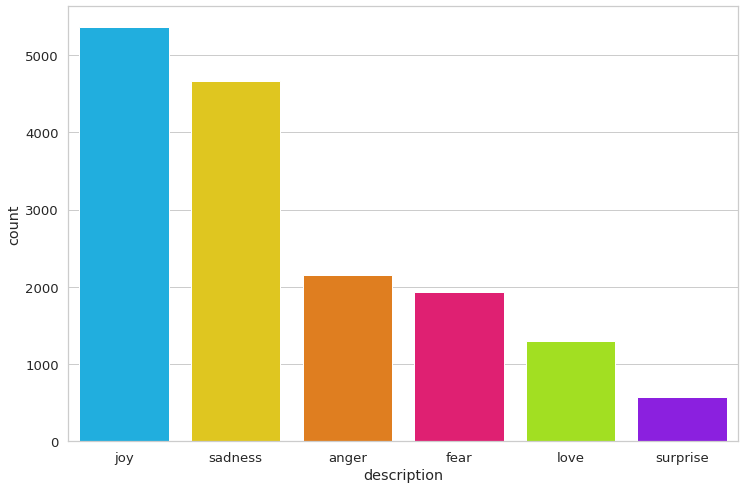

In [53]:
sns.countplot(train['description'],order = train['description'].value_counts(normalize=True).index)

Analyzing Text Statistics

In [54]:
train['text_length'] = train['text'].astype(str).apply(len)
train['text_word_count'] = train['text'].apply(lambda x: len(str(x).split()))

Tweet length analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



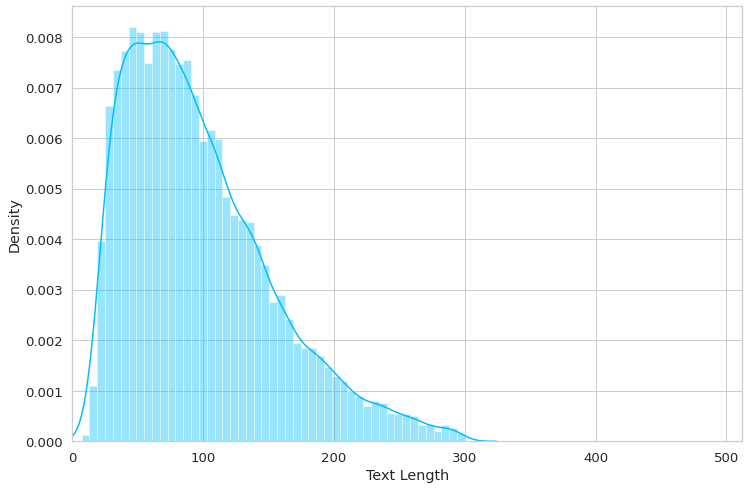

In [55]:
sns.distplot(train['text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length');

Tweet word count analysis

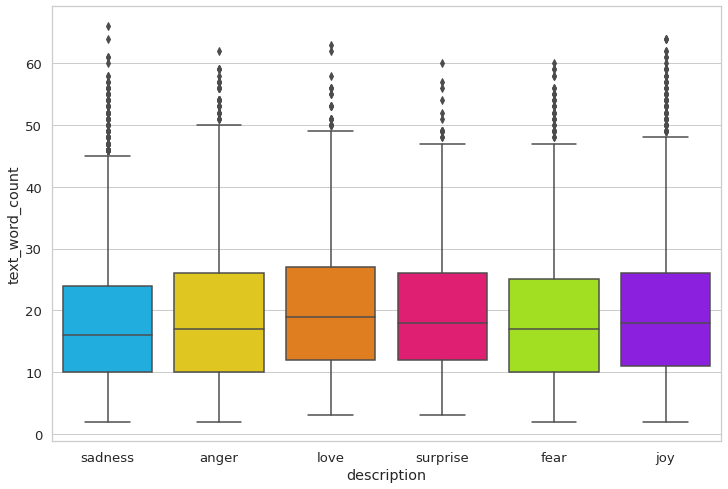

In [56]:
sns.boxplot(x="description", y="text_word_count", data=train)

[Kaggle Emotion Dataset](https://www.kaggle.com/parulpandey/emotion-dataset)